In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### 1.convert to grayscale and copy all images to obj_grayscale folder

#### only needed at first dont rerun it again

In [ ]:
#convert the obj folder images to grayscale and store them inside the yolov3/obj_grayscale.zip
from PIL import Image,ImageOps
import glob

images_path = glob.glob(r"/content/gdrive/MyDrive/MTP_so_far/obj/*.png")
destination_path = "/content/gdrive/MyDrive/obj_grayscale/"


In [ ]:
for i in range(len(images_path)):
  image_complete_path = images_path[i]
  image_name = images_path[i][images_path[i].rfind('/')+1:]

  #get the image
  im1 = Image.open(images_path[i])
 
  #applying greyscale method
  im2 = ImageOps.grayscale(im1)
 
  #save it to the destination folder..
  im2.save(destination_path+image_name)

### copy all the .txt annotations to obj_grayscale folder

In [ ]:
import shutil
annotations_path = glob.glob(r"/content/gdrive/MyDrive/MTP_so_far/obj/*.txt")
for annot in annotations_path:
  shutil.copy(annot,destination_path)


## after it get the obj_grayscale folder zip it and upload it inside Drive/yolov3_grayscale/

In [40]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


### 2.Train the model on the new grayscale images

In [2]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15308, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 15308 (delta 0), reused 0 (delta 0), pack-reused 15306
Receiving objects: 100% (15308/15308), 13.66 MiB | 16.44 MiB/s, done.
Resolving deltas: 100% (10403/10403), done.


In [3]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [4]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [ ]:
# make darknet (build)
!make

In [ ]:
!pwd

/content/darknet


In [6]:
# copy the .zip file into the root directory of cloud VM
!cp /content/gdrive/MyDrive/yolov3_grayscale/obj_grayscale.zip ../

In [ ]:
# unzip the zip file and its contents should now be in /darknet/data/obj_grayscale
!unzip ../obj_grayscale.zip -d data/

### 3.Configuring files for training..

1.change obj.data by changing the backup folder location 

2.change the yolov3-custom.cfg by doing channels = 1

3.update the yolov3_grayscale/ directory

In [8]:
!cp /content/gdrive/MyDrive/yolov3_grayscale/yolov3-custom.cfg ./cfg

In [9]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /content/gdrive/MyDrive/yolov3_grayscale/obj.names ./data
!cp /content/gdrive/MyDrive/yolov3_grayscale/obj.data  ./data

In [10]:
#Generate the train.txt such that it contains the path of each .jpg/.png image inside darknet/data/obj_grayscale/*.png
#store all values in darknet/data/train.txt
import os

image_files = []
os.chdir(os.path.join("data", "obj_grayscale"))
for filename in os.listdir(os.getcwd()):
    if filename.endswith(".png"):
        image_files.append("data/obj_grayscale/" + filename)
os.chdir("..")
with open("train.txt", "w") as outfile:
    for image in image_files:
        outfile.write(image)
        outfile.write("\n")
    outfile.close()
os.chdir("..")

In [11]:
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj_grayscale     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj.data		   person.jpg


In [ ]:
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2021-08-25 09:14:17--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2021-08-25 09:14:17--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  56.8MB/s    in 2.7s    

2021-08-25 09:14:20 (56.8 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [12]:
!./darknet detector train data/obj.data cfg/yolov3-custom.cfg /content/gdrive/MyDrive/yolov3_grayscale/backup/yolov3-custom_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.870155), count: 4, class_loss = 0.004571, iou_loss = 0.095413, total_loss = 0.099985 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.003983, iou_loss = 0.000000, total_loss = 0.003983 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.727145), count: 1, class_loss = 0.471662, iou_loss = 0.108010, total_loss = 0.579671 
 total_bbox = 721610, rewritten_bbox = 0.017322 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.825780), count: 2, class_loss = 0.315122, iou_loss = 0.073479, total_loss = 0.388600 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.658491), count: 1, class_loss = 0.432471, iou_loss = 0.439048, total_loss = 0.871520 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.0

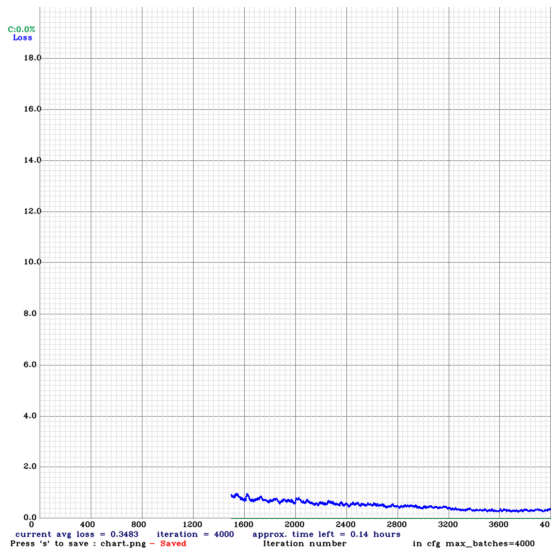

In [15]:
imShow('chart.png')

### 3.Get the inference on the grayscale test data..

#### 3.1. Convert all test images to grayscale and save them in test_grayscale folder(One time run)

In [17]:
#convert the test data into grayscale 
#(takes rgb image from the test folder and convert it to grayscale and copy into test/grayscale folder)
from PIL import Image,ImageOps
import glob

#Different file types..
types = ('*.png', '*.jpg','*.jpeg', '*.tif', '*.tiff', '*.bmp', '*.gif' ,'*.JPEG') # the tuple of file types
test_images_path = []
for files in types:
    test_images_path.extend(glob.glob(r"/content/gdrive/MyDrive/test/"+files))


test_destination_path = "/content/gdrive/MyDrive/test_grayscale/"

for i in range(len(test_images_path)):
  image_complete_path = test_images_path[i]
  image_name = test_images_path[i][test_images_path[i].rfind('/')+1:]

  #get the image
  im1 = Image.open(test_images_path[i])
 
  #applying greyscale method
  im2 = ImageOps.grayscale(im1)
 
  #save it to the destination folder..
  im2.save(test_destination_path+image_name)

###   Inferencing on the Test Images

In [22]:
# need to set our custom cfg to test mode 
#uncomment the #Test section in yolov3-custom.cfg
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3-custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


### Do inference on test grayscale data..
 
#### 1.Change the darknet/src/image.c file just change the line 41 (comment it)

#### 2.use !make to compile it again and run the inference

In [42]:
test_images_path

['/content/gdrive/MyDrive/test/test3.png',
 '/content/gdrive/MyDrive/test/ts14.png',
 '/content/gdrive/MyDrive/test/test14.jpg',
 '/content/gdrive/MyDrive/test/test11.jpg',
 '/content/gdrive/MyDrive/test/test8.jpg',
 '/content/gdrive/MyDrive/test/test9.jpg',
 '/content/gdrive/MyDrive/test/test2.jpg',
 '/content/gdrive/MyDrive/test/test5.jpg',
 '/content/gdrive/MyDrive/test/test1.jpg',
 '/content/gdrive/MyDrive/test/test6.jpg',
 '/content/gdrive/MyDrive/test/test7.jpg',
 '/content/gdrive/MyDrive/test/test18.jpg',
 '/content/gdrive/MyDrive/test/test10.jpg',
 '/content/gdrive/MyDrive/test/test12.jpg',
 '/content/gdrive/MyDrive/test/test17.jpg',
 '/content/gdrive/MyDrive/test/ts17.jpeg',
 '/content/gdrive/MyDrive/test/ts7.jpeg',
 '/content/gdrive/MyDrive/test/ts15.jpeg',
 '/content/gdrive/MyDrive/test/ts4.jpeg',
 '/content/gdrive/MyDrive/test/ts8.jpeg',
 '/content/gdrive/MyDrive/test/ts9.jpeg',
 '/content/gdrive/MyDrive/test/ts5.jpeg',
 '/content/gdrive/MyDrive/test/ts12.jpeg',
 '/content/

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   1 ->  416 x 416 x  32 0.100 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

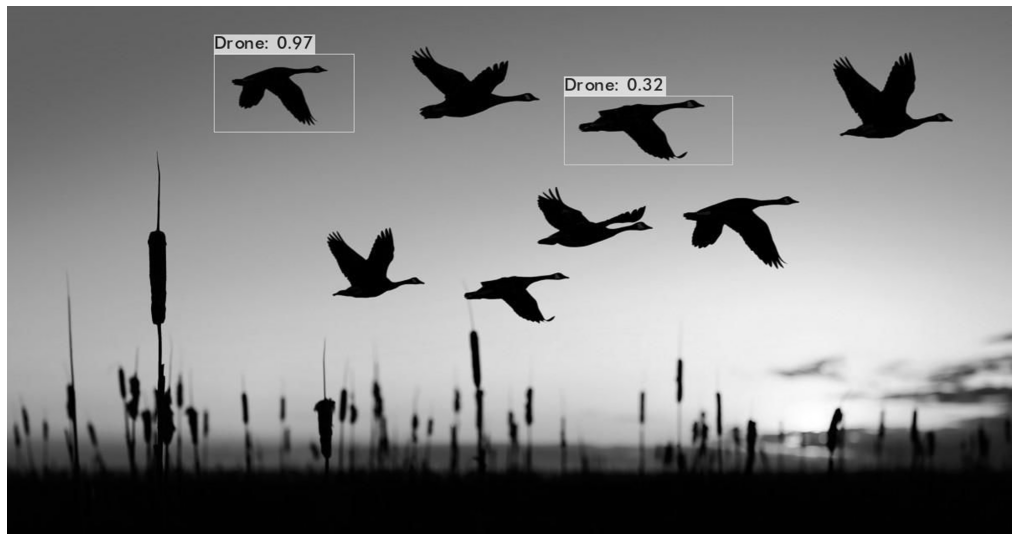

In [85]:
#Run the inference on the test dataset
!./darknet detector test data/obj.data cfg/yolov3-custom.cfg /content/gdrive/MyDrive/yolov3_grayscale/backup/yolov3-custom_final.weights\
 /content/gdrive/MyDrive/test_grayscale/ts6.jpeg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   1 ->  416 x 416 x  32 0.100 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

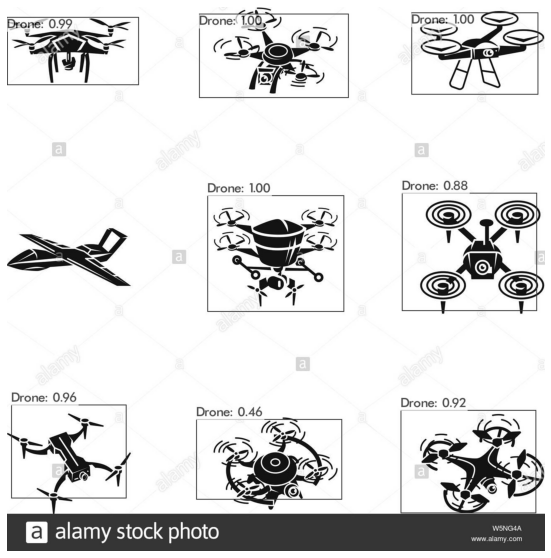

In [88]:
!./darknet detector test data/obj.data cfg/yolov3-custom.cfg /content/gdrive/MyDrive/yolov3_grayscale/backup/yolov3-custom_final.weights\
 /content/gdrive/MyDrive/test_grayscale/test5.jpg -thresh 0.3
imShow('predictions.jpg')